In [52]:
import numpy as np
import numpy.random as npr
import pandas as pd
import scipy.stats as stats
from scipy.stats import geom, norm, expon
import matplotlib.pyplot as plt
from functools import partial

In [54]:
def generate_exponential(
    lmbda: float, 
    size: int
):
    return -np.log(npr.rand(n)) / lmbda
  
def exponential_pdf(
    x: float,
    lmbda: float, 
):
    return lmbda * np.exp(-lmbda * x)

def two_sample_qqplot(data1, data2): 
    """
    This function calculates quantile of 2 samples
    and compare them by a qqplot
    """
    
    if (len(data1) > len(data2)): 
        test1 = data1
        test2 = data2
    else: 
        test2 = data1
        test1 = data2
        
    test1.sort()
    quantile_levels1 = np.arange(len(test1), dtype=float) / len(test1)

    test2.sort()
    quantile_levels2 = np.arange(len(test2), dtype=float) / len(test2)

    quantile_levels = quantile_levels2

    quantiles2 = test2

    quantiles1 = np.interp(quantile_levels, quantile_levels1, test1)

    if (len(data1) > len(data2)): 
        plt.plot(quantiles1, quantiles2, 'bo')
    else: 
        plt.plot(quantiles2, quantiles1, 'bo')
        
    plt.xlabel("Quantiles of the first sample")
    plt.ylabel("Quantiles of the second sample")
    
    maxval = max(test1[-1], test2[-1])
    minval = min(test1[0], test2[0])
    plt.plot([minval, maxval], [minval, maxval], color='red')

    plt.show()

def plot_density_hist(
    data,
    min_x,
    max_x,
    pdf_func,
    title
):
    x = np.linspace(min_x, max_x)
    plt.plot(x, pdf_func(x), color = 'red')
    plt.hist(a, range=(min_x,max_x), bins=80, density=True, edgecolor='black')
    plt.title(title)
    plt.show()
    plt.close()

# Sampling form Exponential distribution
As we know, the inverse of exponential distribution is $x \mapsto-\dfrac{\log (1-U)}{\lambda}$ with $U \sim U[0,1]$. We simulate a r.v following exponential distribution as following:


1.   Draw $U \sim \mathbb{U}[0,1]$
2.   Compute $X = -\dfrac{\log (U)}{\lambda}$. Then $X \sim \mathbb{exp}(\lambda)$

Then, to test that $X$ actually follows exponential distribution, we plot


1.   Histogram of X and the true exponential distribution to compare.
2.   Plot Quantile-Quantile plot of X abd the true exponential distribution. 

In [61]:
lmbda, n = 0.5, 100000
exp_sample = generate_exponential(lmbda, size=n)

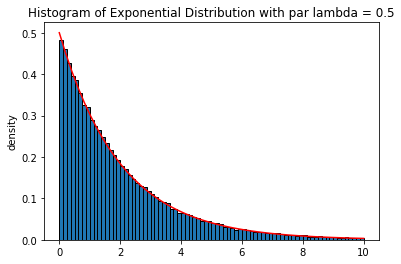

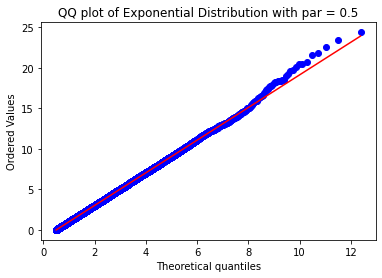

In [64]:
x = np.linspace(0, 10)
plt.plot(x, exponential_pdf(x, lmbda), color = 'red')
plt.hist(exp_sample, range = (0,10), bins=80 , density=True, edgecolor='black')
plt.title('Histogram of Exponential Distribution with par lambda = ' + str(lmbda))
plt.ylabel('density')
plt.show()
plt.close()

stats.probplot(exp_sample, dist='expon', sparams=(lmbda), plot=plt)
plt.title('QQ plot of Exponential Distribution with par = ' + str(lmbda))
plt.show()
plt.close()

# Check that the mean of `exp_sample` converges to the true mean $\dfrac{1}{\lambda}$

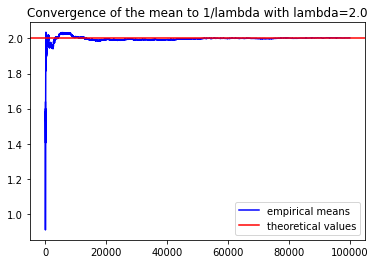

In [27]:
# Now we check the Law of Large Number
sample_means = np.cumsum(exp_sample) / np.arange(1, n+1)

plt.plot(sample_means, color='blue')
plt.axhline(y=1/lmbda, color='red')
plt.title(f"Convergence of the mean to 1/lambda with lambda={1/lmbda}")
labels = ["empirical means", "theoretical values"]
plt.legend(labels)
plt.show()
plt.close()

# Check the lemma

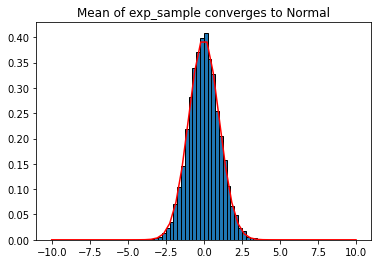

In [39]:
norm_size, exp_size, m = 10000, 1000, 10

z = np.zeros(norm_size + 1)

for i in range(norm_size):
    z[i] = np.sqrt(exp_size) \
        * (lmbda * np.mean(generate_exponential(lmbda, exp_size)) - 1)

x = np.linspace(-m, m)
plt.plot(x, norm.pdf(x), color = 'red')
plt.hist(z, range=(-m,m), bins=80, density=True, edgecolor='black')
plt.title(f"Mean of exp_sample converges to Normal")
plt.show()
plt.close()

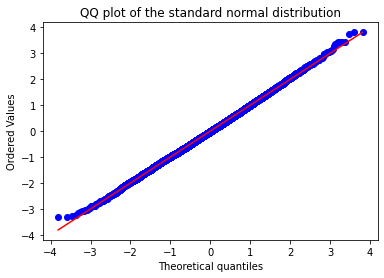

In [40]:
stats.probplot(z, dist="norm", plot=plt)
plt.title("QQ plot of the standard normal distribution")
plt.show()
plt.close()

# Standard Cauchy Distribution

In [44]:
def generate_cauchy(n):
    return np.tan(np.pi * (npr.rand(n) - 0.5))

def cauchy_pdf(x): 
    return 1 / (np.pi * (1 + x**2))

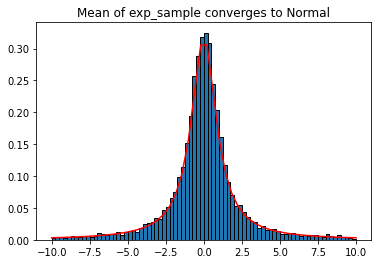

In [66]:
n, m = 10000, 10
cauchy_sample = generate_cauchy(n)

x = np.linspace(-m, m)
plt.plot(x, cauchy_pdf(x), color = 'red')
plt.hist(cauchy_sample, range=(-m,m), bins=80, density=True, edgecolor='black')
plt.title(f"Mean of exp_sample converges to Normal")
plt.show()
plt.close()

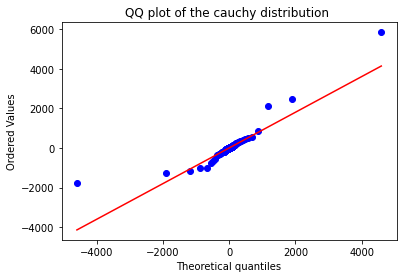

In [67]:
stats.probplot(cauchy_sample, dist="cauchy", plot=plt)
plt.title("QQ plot of the cauchy distribution ")
plt.show()
plt.close()